In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


In [2]:
def interpolator_derivative(x, f, h):
    return (1/(2*h))*(4*f(x+h)-3*f(x)-f(x+2*h))


In [3]:
def symbolic_derivative(f, x):
    x = sp.Symbol('x')
    return sp.diff(f, x)


In [4]:
x = np.linspace(0.1, 1.1, 100)
def f(x): return np.sqrt(np.tan(x))


In [5]:
D_f_c = interpolator_derivative(x, f, 0.01)


In [6]:
def central_difference(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)


In [7]:
D_f_c_teo = central_difference(f, x, 0.01)


In [8]:
x_s = sp.Symbol('x')
f_s = sp.sqrt(sp.tan(x_s))
D_f_c_sym = sp.diff(f_s, x_s)


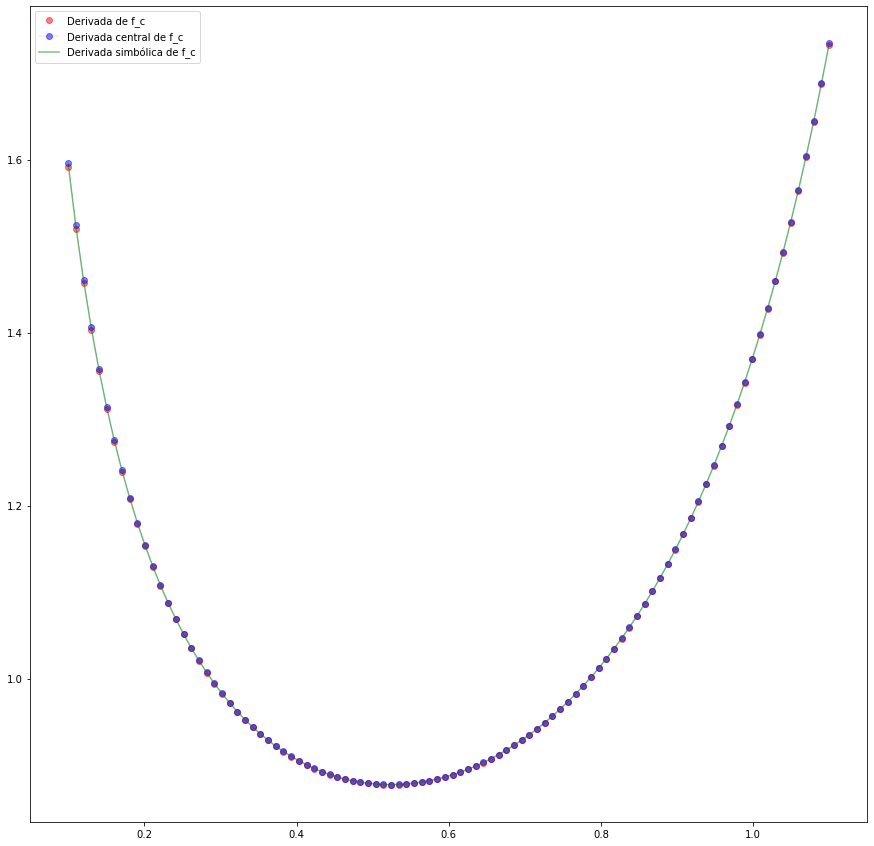

In [9]:
fig = plt.figure(figsize=(15, 15))
D_teo = sp.lambdify(x_s, D_f_c_sym)


plt.plot(x, D_f_c, 'o', label="Derivada de f_c", color="red", alpha=0.5)
plt.plot(x, D_f_c_teo, 'o-', label="Derivada central de f_c",
         color="blue", alpha=0.5, linewidth=0.2)
plt.plot(x, D_teo(x), label="Derivada simbólica de f_c",
         alpha=0.5, color="green")
plt.legend()
plt.show()


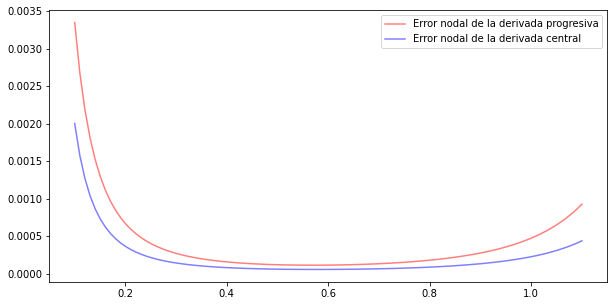

In [10]:
nodal_error_1 = np.abs(D_f_c - D_teo(x))
nodal_error_2 = np.abs(D_f_c_teo - D_teo(x))

fig = plt.figure(figsize=(10, 5))
plt.plot(x, nodal_error_1, label="Error nodal de la derivada progresiva",
         color="red", alpha=0.5)
plt.plot(x, nodal_error_2, label="Error nodal de la derivada central",
         color="blue", alpha=0.5)
plt.legend()
plt.show()
